In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 1. How does work location (remote, hybrid, onsite) affect stress levels and mental health conditions?
# 2. Is there a correlation between hours worked per week and work-life balance rating?
# 3. How does the number of virtual meetings impact productivity changes or social isolation ratings?
# 4. What is the distribution of mental health conditions by job role and industry?
# 5. How does company support for remote work affect employees' satisfaction with remote work and productivity?
# 6. Does physical activity frequency have any relationship with stress levels or sleep quality?
# 7. Are there any notable patterns between age and work-life balance, stress levels, or productivity change?
# 8. How does access to mental health resources correlate with reported mental health conditions?
# 9. What regional differences, if any, are observed in work-life balance and satisfaction with remote work?
# 10. Is there a relationship between years of experience and work-life balance rating? 

In [4]:
mental_df = pd.read_csv(r"C:\Users\So\Downloads\Impact_of_Remote_Work_on_Mental_Health.csv")
mental_df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [ ]:
# 1. How does work location (remote, hybrid, onsite) affect stress levels and mental health conditions?

In [13]:
stress_level = mental_df.pivot_table(
    index = 'Work_Location',
    columns = 'Mental_Health_Condition',
    values = 'Employee_ID',
    aggfunc = 'count').
stress_level

Mental_Health_Condition,Anxiety,Burnout,Depression
Work_Location,,,
Hybrid,428,400,421
Onsite,407,442,412
Remote,443,438,413


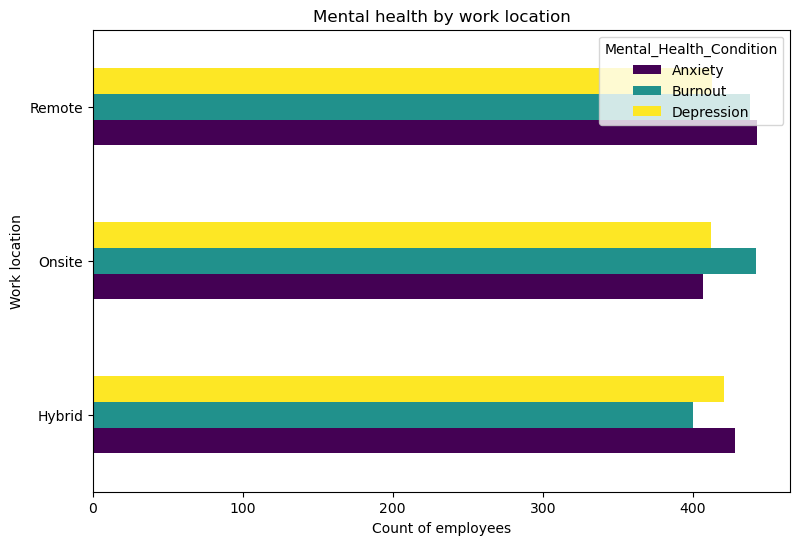

In [105]:
stress_level.plot(kind = 'barh', stacked = False, figsize = (9,6), colormap = 'viridis' )
plt.title('Mental health by work location')
plt.xlabel('Count of employees')
plt.ylabel('Work location')
plt.show()

In [ ]:
# 2. Is there a correlation between hours worked per week and work-life balance rating?

In [35]:
Conditions = [
    (mental_df['Hours_Worked_Per_Week'] >= 20) & (mental_df['Hours_Worked_Per_Week'] < 30),
    (mental_df['Hours_Worked_Per_Week'] >= 30) & (mental_df['Hours_Worked_Per_Week'] <= 40),
    (mental_df['Hours_Worked_Per_Week'] > 40)
]

Values = ['Part time', 'Full time', 'Over time']

mental_df['Worked Hours bins'] = np.select(Conditions, Values, default = 'Overtime')
mental_df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Hours_Worked_Bin,Worked Hours bins
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,40-49,Over time
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,No,Increase,3,Satisfied,2,Weekly,Good,Asia,50-59,Over time
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,No,No Change,4,Unsatisfied,5,NaN,Poor,North America,40-49,Over time
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,...,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe,30-39,Full time
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,30-39,Full time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,...,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia,20-29,Part time
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,...,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa,40-49,Over time
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,...,No,Increase,3,Satisfied,1,Daily,Poor,Oceania,30-39,Full time
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,...,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia,50-59,Over time


In [68]:
pd.DataFrame(mental_df.groupby('Worked Hours bins')['Work_Life_Balance_Rating'].mean()).round(2)

,Work_Life_Balance_Rating
Worked Hours bins,
Full time,3.01
Over time,2.97
Part time,2.98


In [45]:
hours_balance_rating = mental_df[['Hours_Worked_Per_Week', 'Work_Life_Balance_Rating']]
hours_balance_rating

,Hours_Worked_Per_Week,Work_Life_Balance_Rating
0,47,2
1,52,1
2,46,5
3,32,4
4,35,2
...,...,...
4995,24,5
4996,48,1
4997,34,4
4998,58,5


In [41]:
mental_df[['Hours_Worked_Per_Week', 'Social_Isolation_Rating']].corr()

,Hours_Worked_Per_Week,Work_Life_Balance_Rating
Hours_Worked_Per_Week,1.00000,0.00082
Work_Life_Balance_Rating,0.00082,1.00000


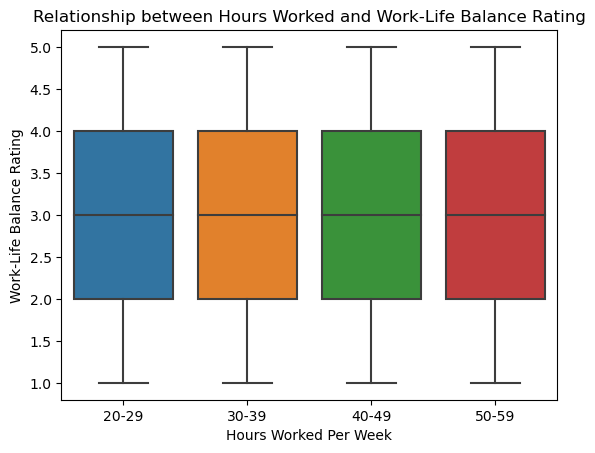

In [164]:
sns.boxplot(x='Hours_Worked_Bin', y='Work_Life_Balance_Rating', data=mental_df)

# Add labels and title
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Work-Life Balance Rating')
plt.title('Relationship between Hours Worked and Work-Life Balance Rating')

# Show the plot
plt.show()

In [ ]:
# 3. How does the number of virtual meetings impact productivity changes or social isolation ratings?

In [79]:
virt_prod = mental_df.groupby(['Job_Role','Productivity_Change'])[['Number_of_Virtual_Meetings', 'Social_Isolation_Rating']].agg(['mean','median','std'])
virt_prod

Number_of_Virtual_Meetings         \
                                                            mean median   
Job_Role          Productivity_Change                                     
Data Scientist    Decrease                              7.541284    7.0   
                  Increase                              7.168831    7.0   
                  No Change                             7.680162    8.0   
Designer          Decrease                              7.507692    8.0   
                  Increase                              7.686636    8.0   
                  No Change                             7.548780    8.0   
HR                Decrease                              7.378906    7.0   
                  Increase                              7.461864    8.0   
                  No Change                             7.834821    8.0   
Marketing         Decrease                              7.791667    8.0   
                  Increase                              7.407080    7.0   
                  No Change                             7.175115    7.0   
Project Manager   Decrease                              7.245487    7.0   
                  Increase                              7.382883    7.0   
                  No Change                             7.861925    8.0   
Sales             Decrease                              8.043307    9.0   
                  Increase                              7.419214    7.0   
                  No Change                             7.804000    8.0   
Software Engineer Decrease                              7.538793    8.0   
                  Increase                              7.480000    8.0   
                  No Change                             7.736220    8.0   

                                                Social_Isolation_Rating  \
                                            std                    mean   
Job_Role          Productivity_Change                                     
Data Scientist    Decrease             4.669801                3.119266   
                  Increase             4.779674                3.073593   
                  No Change            4.533405                2.979757   
Designer          Decrease             4.857421                3.157692   
                  Increase             4.604090                2.972350   
                  No Change            4.413761                2.975610   
HR                Decrease             4.754460                3.058594   
                  Increase             4.677996                3.012712   
                  No Change            4.490592                2.986607   
Marketing         Decrease             4.581016                2.925000   
                  Increase             4.519857                3.013274   
                  No Change            4.463507                2.976959   
Project Manager   Decrease             4.714035                2.848375   
                  Increase             4.713730                2.914414   
                  No Change            4.669966                2.903766   
Sales             Decrease             4.758402                2.948819   
                  Increase             4.825806                3.096070   
                  No Change            4.481733                2.964000   
Software Engineer Decrease             4.553506                2.961207   
                  Increase             4.794975                3.044444   
                  No Change            4.508809                2.960630   

                                                        
                                      median       std  
Job_Role          Productivity_Change                   
Data Scientist    Decrease               3.0  1.431861  
                  Increase               3.0  1.447260  
                  No Change              3.0  1.435467  
Designer          Decrease               3.0  1.406733  
                  Increase           

<Axes: xlabel='Productivity_Change'>

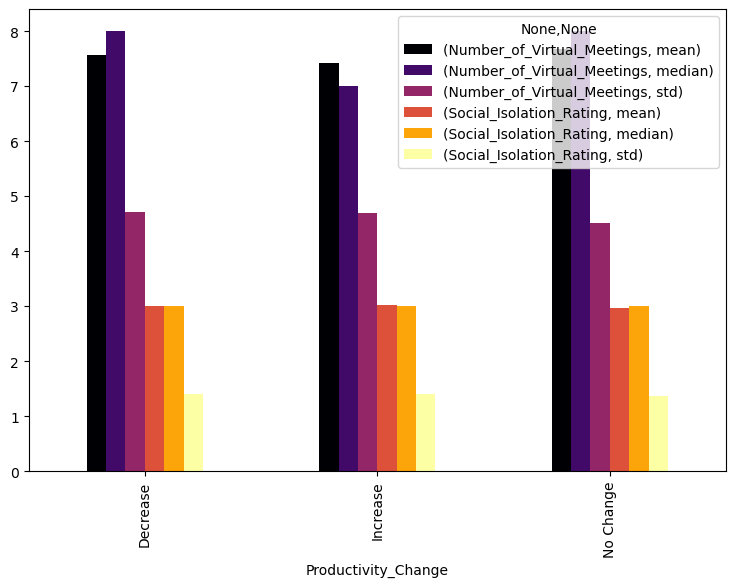

In [77]:
virt_prod.plot(kind = 'bar', stacked = False, figsize = (9,6), colormap = 'inferno' )

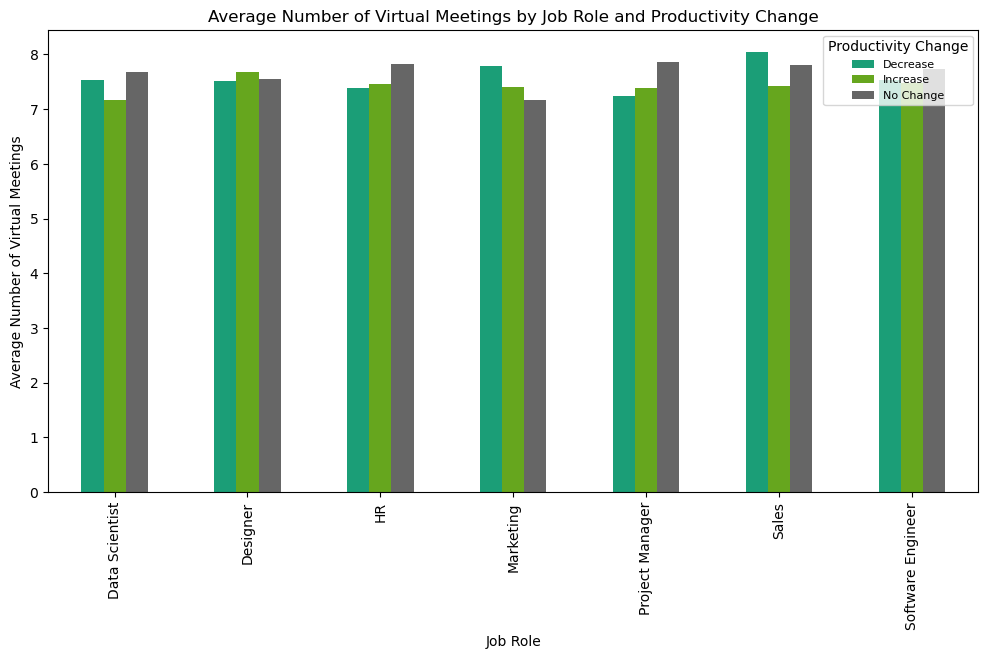

In [103]:
pivot_meetings_PC = mental_df.pivot_table(values='Number_of_Virtual_Meetings', index='Job_Role', columns='Productivity_Change', aggfunc='mean')

pivot_meetings_PC.plot(kind='bar', figsize=(12, 6), cmap = 'Dark2')
plt.title("Average Number of Virtual Meetings by Job Role and Productivity Change")
plt.ylabel("Average Number of Virtual Meetings")
plt.xlabel("Job Role")
plt.legend(title="Productivity Change", fontsize = 8)
plt.show()

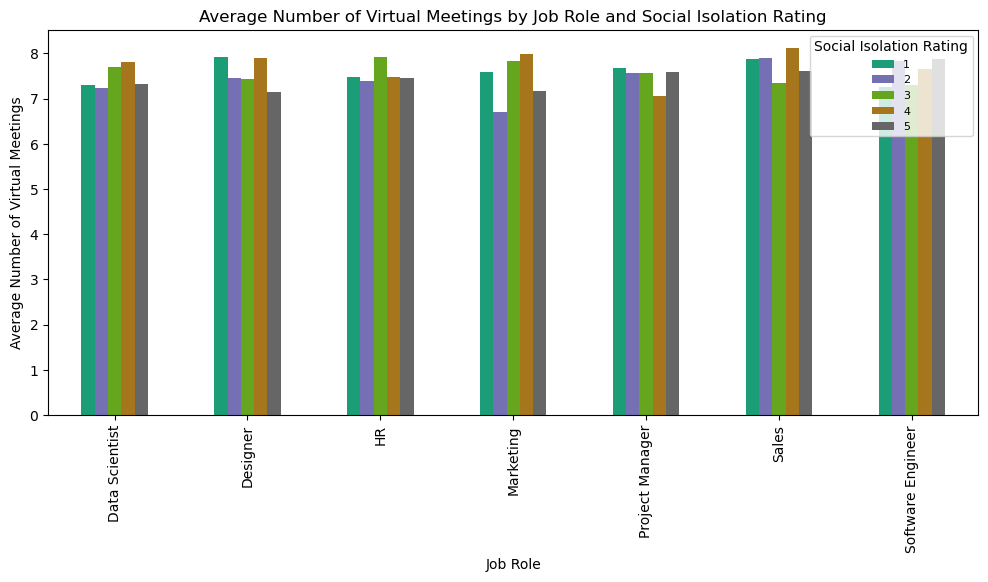

In [102]:
pivot_meetings_SIR = mental_df.pivot_table(values='Number_of_Virtual_Meetings', index='Job_Role', columns='Social_Isolation_Rating', aggfunc='mean')

pivot_meetings_SIR.plot(kind ='bar', figsize = (12,5), cmap = 'Dark2')
plt.title('Average Number of Virtual Meetings by Job Role and Social Isolation Rating')
plt.xlabel('Job Role')
plt.ylabel('Average Number of Virtual Meetings')
plt.legend(title = 'Social Isolation Rating', fontsize = 8, loc = 'upper right')

plt.show()

In [ ]:
# 4. What is the distribution of mental health conditions by job role and industry?

In [111]:
mental_df
pd.set_option('display.max_columns', 25)
mental_df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Hours_Worked_Bin,Worked Hours bins
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,40-49,Over time
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,50-59,Over time
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America,40-49,Over time
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe,30-39,Full time
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,30-39,Full time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia,20-29,Part time
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa,40-49,Over time
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania,30-39,Full time
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia,50-59,Over time


In [133]:
mental_health_distribution = mental_df.pivot_table(index =['Industry', 'Job_Role'],
                                                   columns = 'Mental_Health_Condition',
                                                   aggfunc = 'size',
                                                   fill_value = 0)
mental_health_distribution

Mental_Health_Condition          Anxiety  Burnout  Depression
Industry      Job_Role                                       
Consulting    Data Scientist          23       32          19
              Designer                26       18          27
              HR                      21       32          31
              Marketing               23       18          27
              Project Manager         27       26          19
              Sales                   26       21          26
              Software Engineer       32       19          23
Education     Data Scientist          22       33          24
              Designer                23       26          23
              HR                      23       23          25
              Marketing               22       11          13
              Project Manager         37       31          31
              Sales                   20       26          20
              Software Engineer       29       24          35
Finance       Data Scientist          23       42          20
              Designer                29       28          24
              HR                      33       37          26
              Marketing               27       25          22
              Project Manager         28       23          27
              Sales                   30       21          31
              Software Engineer       16       26          29
Healthcare    Data Scientist          28       30          24
              Designer                23       33          39
              HR                      14       21          25
              Marketing               20       29          20
              Project Manager         25       27          27
              Sales                   27       33          32
              Software Engineer       23       18          34
IT            Data Scientist          26       32          24
              Designer                18       21          20
              HR                      33       25          29
              Marketing               24       26          28
              Project Manager         33       29          31
              Sales                   38       28          31
              Software Engineer       33       31          19
Manufacturing Data Scientist          24       24          20
              Designer                22       22          25
              HR                      30       32          25
              Marketing               23       25          17
              Project Manager         32       24          22
              Sales                   30       22          22
              Software Engineer       20       26          19
Retail        Data Scientist          23       32          36
              Designer                34       27          26
              HR                      30       24          24
              Marketing               31       24          16
              Project Manager         23       21          33
              Sales                   26       23          24
              Software Engineer       25       29          32

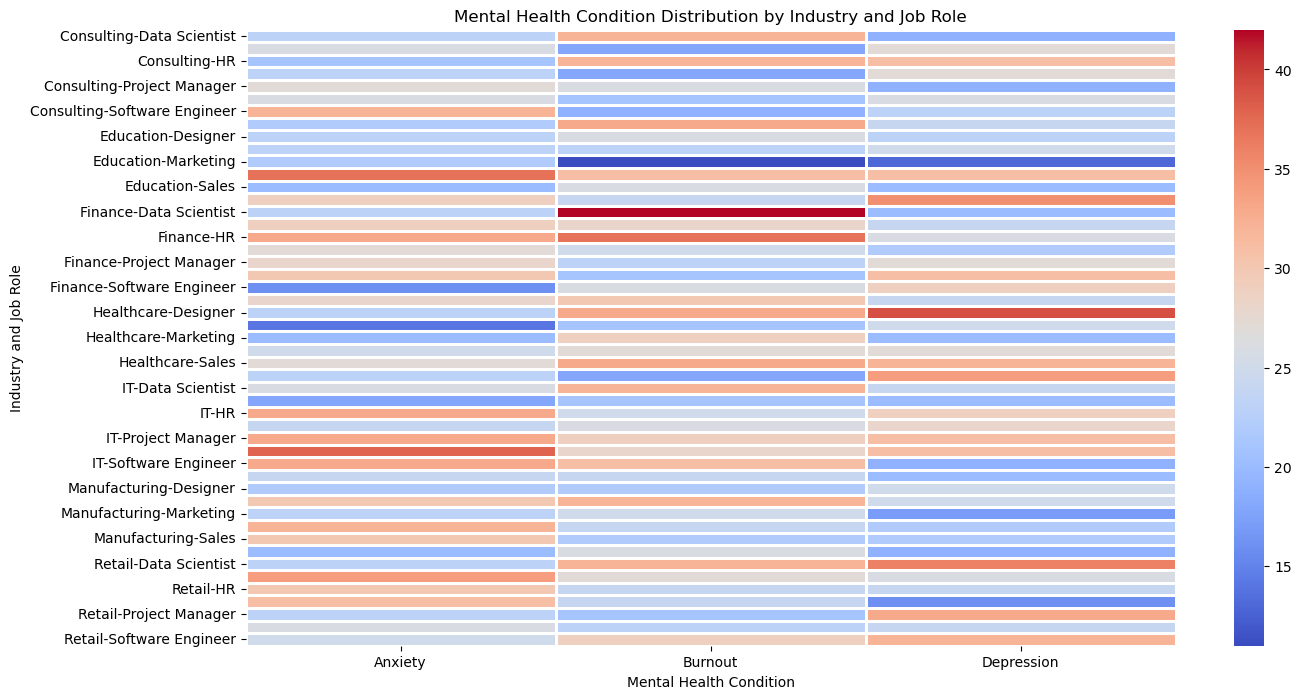

In [149]:
plt.figure(figsize=(15, 8))  
sns.heatmap(mental_health_distribution, annot=False, cmap='coolwarm', fmt='d', cbar=True, linewidth = 1)
plt.title('Mental Health Condition Distribution by Industry and Job Role')
plt.xlabel('Mental Health Condition')
plt.ylabel('Industry and Job Role')
plt.show()

In [ ]:
# 5. How does company support for remote work affect employees' satisfaction with remote work and productivity?

In [172]:
mental_df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Hours_Worked_Bin,Worked Hours bins,Productivity_Change_int,Satisfaction_with_Remote_Work_int
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,40-49,Over time,1,1
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,50-59,Over time,2,2
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America,40-49,Over time,0,1
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe,30-39,Full time,2,1
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,30-39,Full time,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia,20-29,Part time,1,0
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa,40-49,Over time,1,2
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania,30-39,Full time,2,2
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia,50-59,Over time,2,1


In [177]:
satisfaction = mental_df.pivot_table(index = 'Company_Support_for_Remote_Work', columns = ['Satisfaction_with_Remote_Work','Productivity_Change'], aggfunc = 'size')
satisfaction

Satisfaction_with_Remote_Work    Neutral                    Satisfied  \
Productivity_Change             Decrease Increase No Change  Decrease   
Company_Support_for_Remote_Work                                         
1                                    112      101       117       124   
2                                     98      101       107       103   
3                                    110      126       127       132   
4                                    125      109        95       116   
5                                     97      109       114       130   

Satisfaction_with_Remote_Work                      Unsatisfied           \
Productivity_Change             Increase No Change    Decrease Increase   
Company_Support_for_Remote_Work                                           
1                                     92        92         114      110   
2                                    102       118         118      119   
3                                    121       120         119      107   
4                                     90       110         131       96   
5                                    111       114         108       92   

Satisfaction_with_Remote_Work              
Productivity_Change             No Change  
Company_Support_for_Remote_Work            
1                                     105  
2                                     119  
3                                     115  
4                                     112  
5                                     112

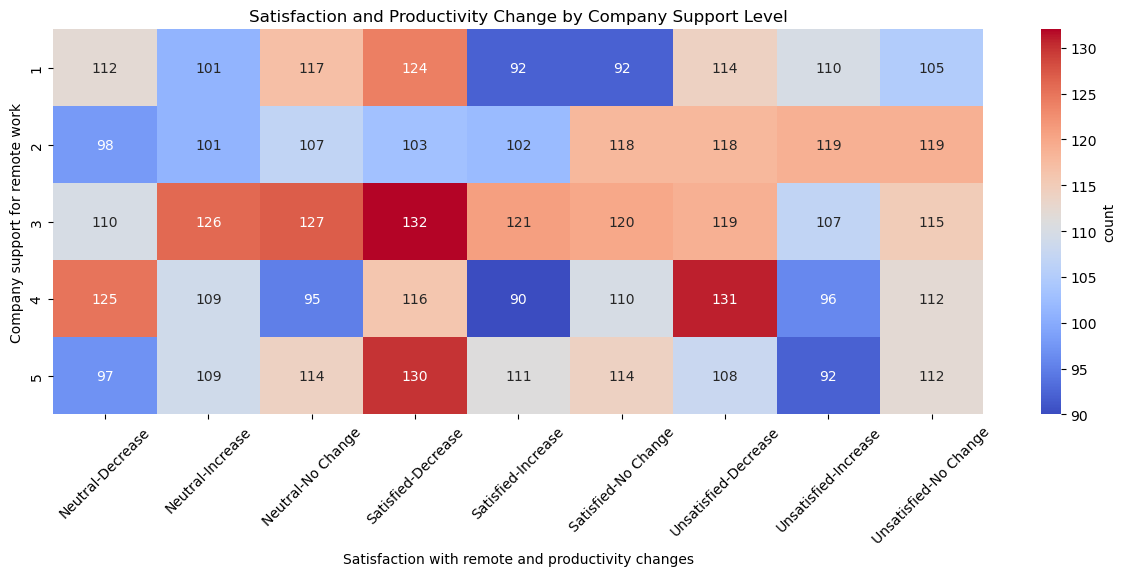

In [187]:
plt.figure(figsize = (15,5))
sns.heatmap(data = satisfaction, cmap = 'coolwarm', annot = True, fmt = 'd', cbar_kws = {'label': 'count'})
plt.title('Satisfaction and Productivity Change by Company Support Level')
plt.xlabel('Satisfaction with remote and productivity changes')
plt.ylabel('Company support for remote work')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 6. Does physical activity frequency have any relationship with stress levels or sleep quality?

In [216]:
phy_activity_df = mental_df[['Physical_Activity','Stress_Level','Sleep_Quality']]
phy_activity_df

,Physical_Activity,Stress_Level,Sleep_Quality
0,Weekly,Medium,Good
1,Weekly,Medium,Good
2,NaN,Medium,Poor
3,NaN,High,Poor
4,Weekly,High,Average
...,...,...,...
4995,Weekly,High,Average
4996,NaN,Low,Average
4997,Daily,High,Poor
4998,Daily,Low,Average


In [217]:
phy_activity_df.loc[:,'Physical_Activity'] = phy_activity_df['Physical_Activity'].fillna('1')
phy_activity_df

,Physical_Activity,Stress_Level,Sleep_Quality
0,Weekly,Medium,Good
1,Weekly,Medium,Good
2,1,Medium,Poor
3,1,High,Poor
4,Weekly,High,Average
...,...,...,...
4995,Weekly,High,Average
4996,1,Low,Average
4997,Daily,High,Poor
4998,Daily,Low,Average


In [218]:
Physical_Activity_mapping = {'1': 1,'Daily': 2, 'Weekly': 3}
Stress_Level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
Sleep_Quality_mapping = {'Poor': 1, 'Average': 2, 'Good': 3}

phy_activity_df.loc[:,'Physical_Activity'] = phy_activity_df['Physical_Activity'].map(Physical_Activity_mapping)
phy_activity_df.loc[:,'Stress_Level'] = phy_activity_df['Stress_Level'].map(Stress_Level_mapping)
phy_activity_df.loc[:,'Sleep_Quality'] = phy_activity_df['Sleep_Quality'].map(Sleep_Quality_mapping)
phy_activity_df

,Physical_Activity,Stress_Level,Sleep_Quality
0,3,2,3
1,3,2,3
2,1,2,1
3,1,3,1
4,3,3,2
...,...,...,...
4995,3,3,2
4996,1,1,2
4997,2,3,1
4998,2,1,2


In [221]:
phy_activity_df_correlation = phy_activity_df.corr()

In [238]:
phy_activity_df_correlation

,Physical_Activity,Stress_Level,Sleep_Quality
Physical_Activity,1.000000,0.000288,-0.007715
Stress_Level,0.000288,1.000000,-0.018505
Sleep_Quality,-0.007715,-0.018505,1.000000


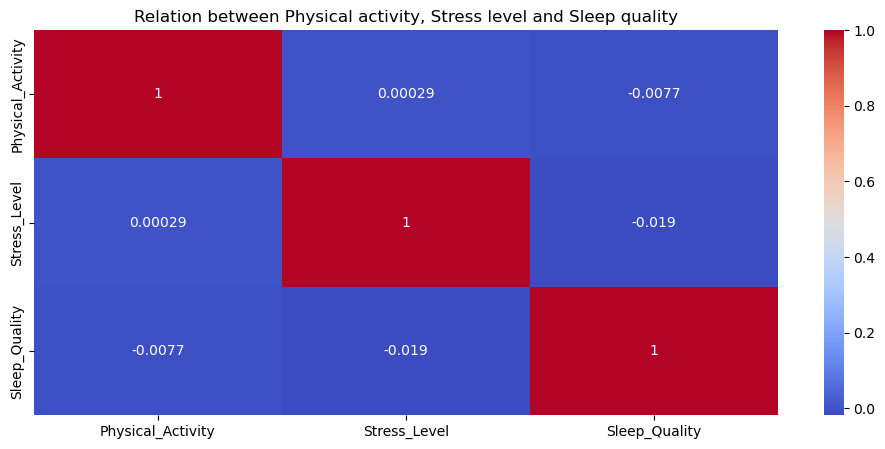

In [236]:
plt.figure(figsize = (12,5))
sns.heatmap(phy_activity_df_correlation, cmap = 'coolwarm', annot = True)
plt.title('Relation between Physical activity, Stress level and Sleep quality')
plt.show()

In [237]:
# 7. Are there any notable patterns between age and work-life balance, stress levels, or productivity change?

In [244]:
age_pattern = mental_df[['Age','Work_Life_Balance_Rating','Stress_Level','Productivity_Change']]
age_pattern

,Age,Work_Life_Balance_Rating,Stress_Level,Productivity_Change
0,32,2,2,1
1,40,1,2,3
2,59,5,2,2
3,27,4,3,3
4,49,2,3,1
...,...,...,...,...
4995,32,5,3,1
4996,39,1,1,1
4997,42,4,3,3
4998,27,5,1,3


In [241]:
Stress_Level_mapping = {'Low':1,'Medium':2, 'High':3}
Productivity_Change_mapping = {'Decrease':1,'No Change':2, 'Increase':3}

In [242]:
mental_df.loc[:,'Stress_Level'] = mental_df['Stress_Level'].map(Stress_Level_mapping)
mental_df.loc[:,'Productivity_Change'] = mental_df['Productivity_Change'].map(Productivity_Change_mapping)

In [245]:
age_pattern

,Age,Work_Life_Balance_Rating,Stress_Level,Productivity_Change
0,32,2,2,1
1,40,1,2,3
2,59,5,2,2
3,27,4,3,3
4,49,2,3,1
...,...,...,...,...
4995,32,5,3,1
4996,39,1,1,1
4997,42,4,3,3
4998,27,5,1,3


In [258]:
age_pattern.loc[:,'Age_group'] = pd.cut(age_pattern['Age'], bins = [20,30,40,50,60], labels = ['20-30', '30-40', '40-50', '50-60']) 
age_pattern_grouped = age_pattern.groupby('Age_group').mean().reset_index()

In [259]:
age_pattern_grouped

,Age_group,Age,Work_Life_Balance_Rating,Stress_Level,Productivity_Change
0,20-30,25.904274,2.960684,1.987179,1.945299
1,30-40,35.518967,2.949153,2.014528,1.995964
2,40-50,45.557911,2.992430,2.019682,1.970477
3,50-60,55.493701,3.031496,2.009449,1.966142


Text(0, 0.5, 'Productivity Change')

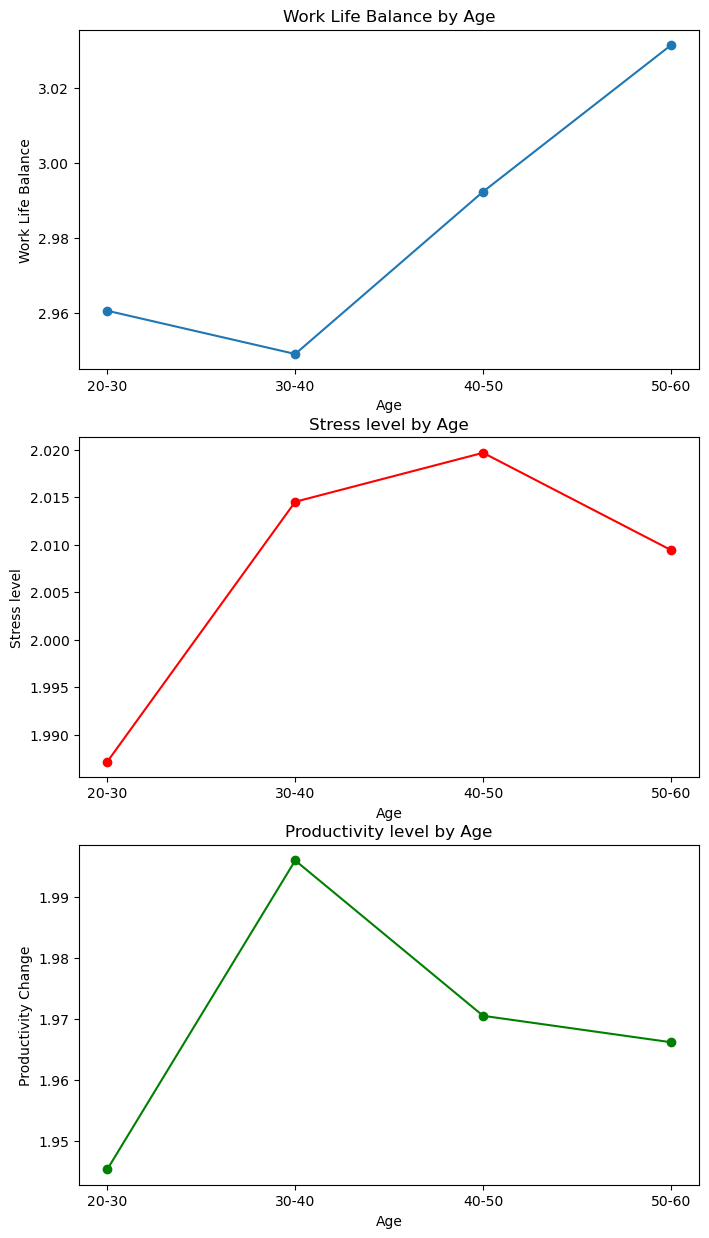

In [272]:
fig, axs = plt.subplots(3,1, figsize = (8,15))

axs[0].plot(age_pattern_grouped['Age_group'], age_pattern_grouped['Work_Life_Balance_Rating'], marker = 'o',)
axs[0].set_title('Work Life Balance by Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Work Life Balance')

axs[1].plot(age_pattern_grouped['Age_group'], age_pattern_grouped['Stress_Level'], marker = 'o', color = 'red')
axs[1].set_title('Stress level by Age')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Stress level')

axs[2].plot(age_pattern_grouped['Age_group'], age_pattern_grouped['Productivity_Change'], marker = 'o', color = 'Green')
axs[2].set_title('Productivity level by Age')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Productivity Change')



In [ ]:
# 8. How does access to mental health resources correlate with reported mental health conditions?

In [273]:
mental_df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Hours_Worked_Bin,Worked Hours bins,Productivity_Change_int,Satisfaction_with_Remote_Work_int
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,2,Depression,No,1,1,Unsatisfied,1,Weekly,Good,Europe,40-49,Over time,1,1
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,2,Anxiety,No,3,3,Satisfied,2,Weekly,Good,Asia,50-59,Over time,2,2
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,2,Anxiety,No,2,4,Unsatisfied,5,NaN,Poor,North America,40-49,Over time,0,1
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,3,Depression,Yes,3,3,Unsatisfied,3,NaN,Poor,Europe,30-39,Full time,2,1
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,3,NaN,Yes,1,3,Unsatisfied,3,Weekly,Average,North America,30-39,Full time,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,3,Burnout,Yes,1,4,Neutral,1,Weekly,Average,Asia,20-29,Part time,1,0
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,1,Depression,Yes,1,1,Satisfied,1,NaN,Average,Africa,40-49,Over time,1,2
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,3,Burnout,No,3,3,Satisfied,1,Daily,Poor,Oceania,30-39,Full time,2,2
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,1,NaN,Yes,3,3,Unsatisfied,4,Daily,Average,Asia,50-59,Over time,2,1


In [279]:
mental_health = mental_df.pivot_table(index = 'Mental_Health_Condition', columns = 'Access_to_Mental_Health_Resources', aggfunc = 'size')
mental_health_percentage = mental_health.div(mental_health.sum(axis = 1), axis = 0) *100).round(2)
mental_health_percentage

Access_to_Mental_Health_Resources,No,Yes
Mental_Health_Condition,,
Anxiety,50.55,49.45
Burnout,51.95,48.05
Depression,49.28,50.72


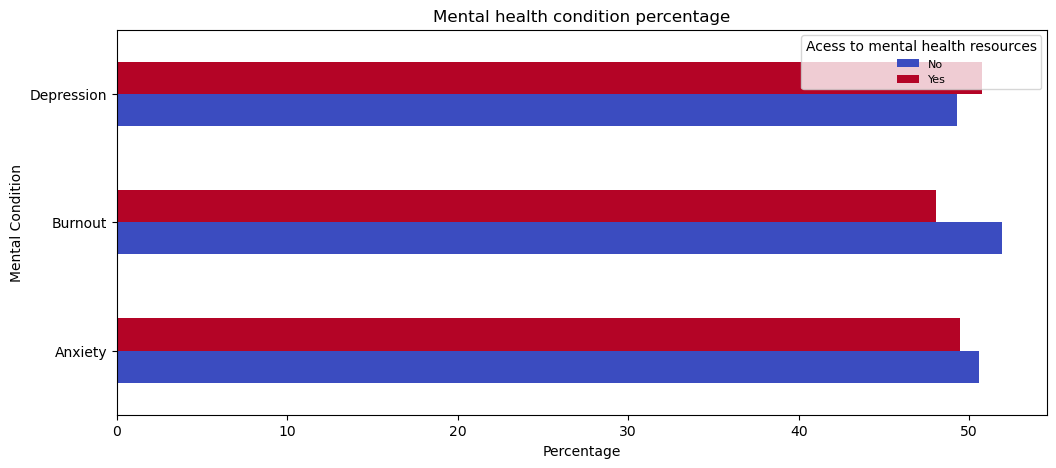

In [348]:
mental_health_percentage.plot(kind = 'barh', figsize = (12,5), cmap = 'coolwarm')
plt.ylabel('Mental Condition')
plt.xlabel('Percentage')
plt.title('Mental health condition percentage')
plt.legend(title = 'Acess to mental health resources', fontsize = 8)
plt.show()

In [ ]:
# 9. What regional differences, if any, are observed in work-life balance and satisfaction with remote work?

In [344]:
Region_rating = mental_df.groupby('Region')['Work_Life_Balance_Rating'].mean().reset_index().sort_values(by = 'Work_Life_Balance_Rating',
ascending = False ).round(2)
Region_rating.set_index('Region', inplace = True)
Region_rating

,Work_Life_Balance_Rating
Region,
Asia,3.04
Europe,3.01
Oceania,2.99
North America,2.97
South America,2.96
Africa,2.94


Text(0.5, 1.0, 'Work-Life Balance Rating by Region')

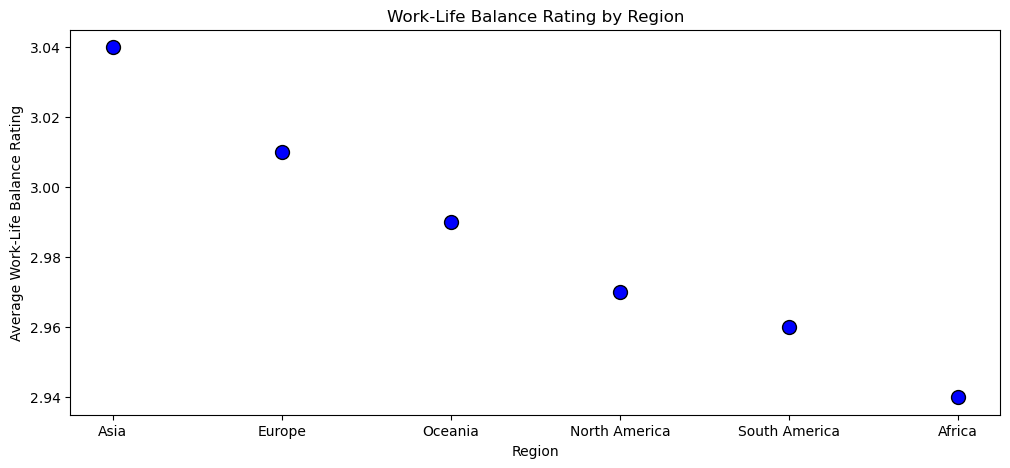

In [354]:
plt.figure(figsize = (12,5))
plt.scatter(Region_rating.index, Region_rating['Work_Life_Balance_Rating'], color='blue', s=100, edgecolor='black')

plt.xlabel('Region')
plt.ylabel('Average Work-Life Balance Rating')
plt.title('Work-Life Balance Rating by Region')

In [316]:
region_satisfaction = mental_df.pivot_table(index = 'Region', columns = 'Satisfaction_with_Remote_Work', aggfunc = 'size')
region_satisfaction_percentage = (region_satisfaction.div(region_satisfaction.sum(axis = 1),axis = 0) *100).round(2)
region_satisfaction_percentage

Satisfaction_with_Remote_Work,Neutral,Satisfied,Unsatisfied
Region,,,
Africa,34.53,31.16,34.30
Asia,34.14,32.33,33.53
Europe,31.67,35.36,32.98
North America,34.62,32.69,32.69
Oceania,31.37,36.45,32.18
South America,31.56,32.89,35.55


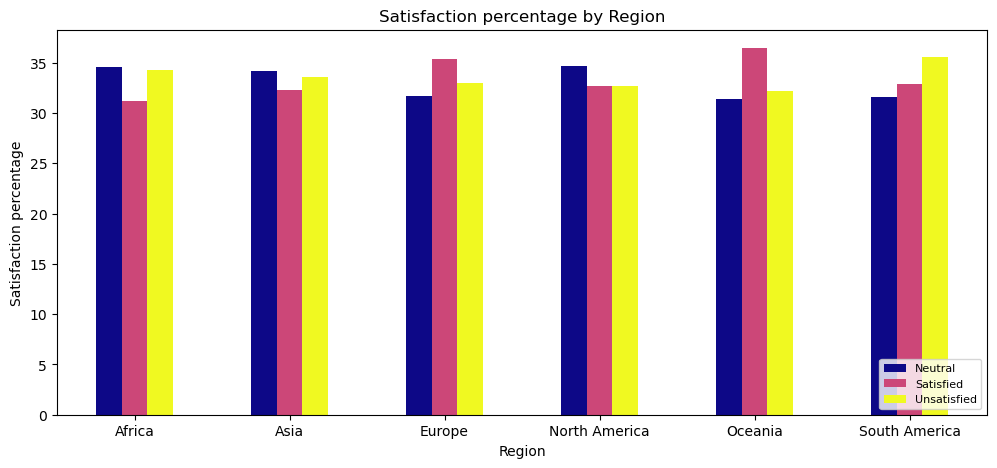

In [374]:
region_satisfaction_percentage.plot(kind = 'bar', cmap = 'plasma', figsize =(12,5))

plt.xlabel('Region')
plt.title('Satisfaction percentage by Region')
plt.ylabel('Satisfaction percentage')
plt.xticks(rotation=360)
plt.legend(fontsize = 8, loc = 'lower right')
plt.show()

In [ ]:
# 10. Is there a relationship between years of experience and work-life balance rating? 

In [376]:
mental_df[['Years_of_Experience','Work_Life_Balance_Rating']]

,Years_of_Experience,Work_Life_Balance_Rating
0,13,2
1,3,1
2,22,5
3,20,4
4,32,2
...,...,...
4995,4,5
4996,27,1
4997,21,4
4998,26,5


In [388]:
relation_age_work_balance = (mental_df['Years_of_Experience'].corr(mental_df['Work_Life_Balance_Rating'])).round(5)
relation_age_work_balance

0.0017